# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/gil/Documents/06-2023 Instacart Basket Analysis New'


# Importing dataframe

In [3]:
customers_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customers_ords_prods_merged.pkl'))

## Creating a bar chart

<Axes: >

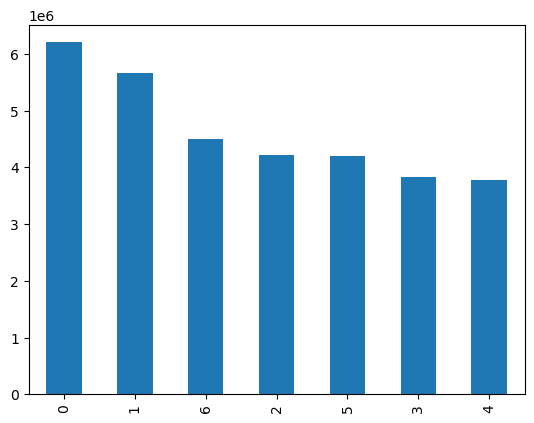

In [5]:
#Create a bar chart 
customers_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()


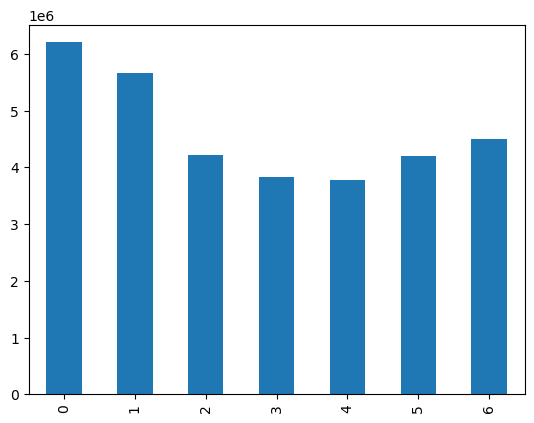

In [51]:
#Sort it 
bar_sorted = customers_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()


<Axes: >

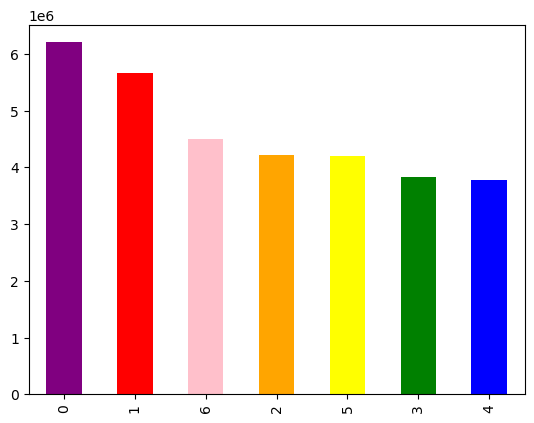

In [7]:
#Change colors 
customers_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])


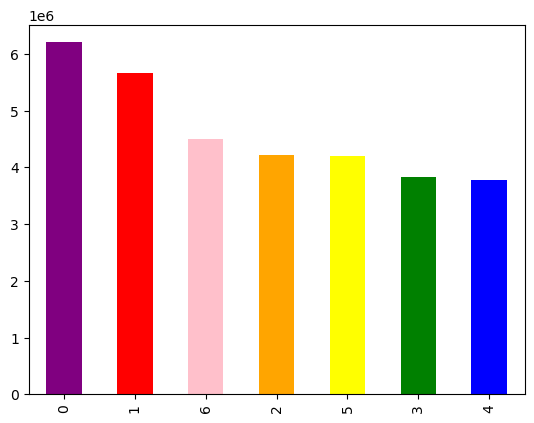

In [8]:
#Save the bar chart
bar = customers_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
#Export it 
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))


## Creating a histogram 

<Axes: ylabel='Frequency'>

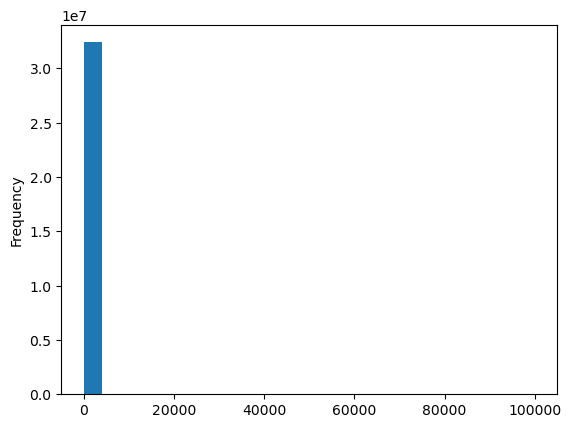

In [11]:
#Create a histogram 
customers_ords_prods_merged['prices'].plot.hist(bins = 25)


<Axes: xlabel='prices', ylabel='prices'>

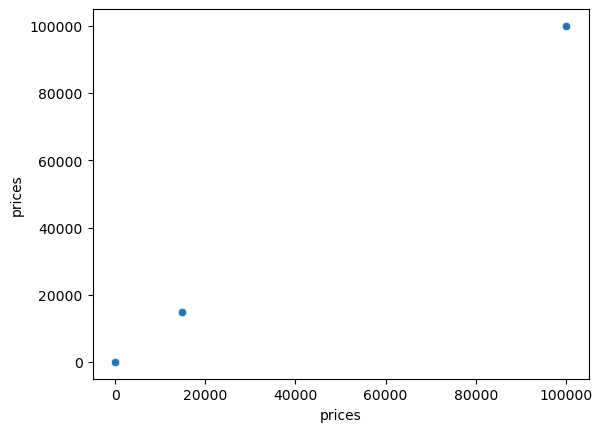

In [12]:
#create a scatterplot to look for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = customers_ords_prods_merged)


In [14]:
#Look for values above $100
customers_ords_prods_merged.loc[customers_ords_prods_merged['prices'] > 100]


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,number_of_days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,STATE,Age,date_joined,Number of Dependents,Marital Status,income,_merge
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [15]:
#Mark those as missing values
customers_ords_prods_merged.loc[customers_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [17]:
#Check the max value
customers_ords_prods_merged['prices'].max()

25.0

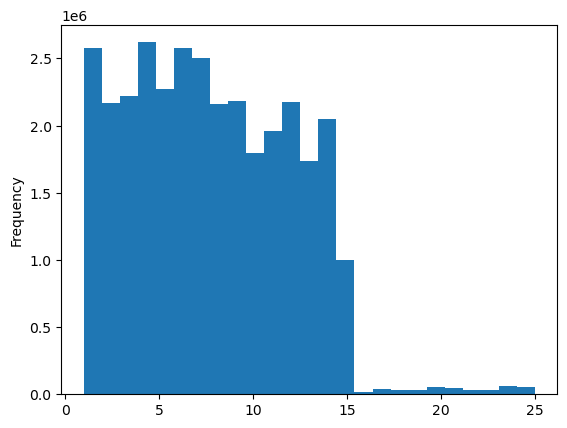

In [18]:
#Retry the same histogram from before
hist = customers_ords_prods_merged['prices'].plot.hist(bins = 25)


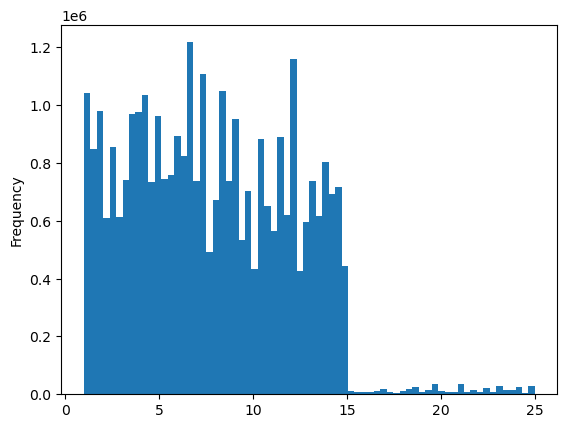

In [19]:
#Reduce the number of bins
hist2 = customers_ords_prods_merged['prices'].plot.hist(bins = 70)


In [20]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist2_orders_dow.png'))


## Creating a sample + line chart

In [21]:
np.random.seed(4)
dev = np.random.rand(len(customers_ords_prods_merged)) <= 0.7

In [22]:
dev


array([False,  True, False, ...,  True,  True,  True])

In [23]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [25]:
big = customers_ords_prods_merged[dev]

In [26]:
small = customers_ords_prods_merged[~dev]

In [27]:
len(customers_ords_prods_merged)

32404859

In [28]:
len(big) + len(small)

32404859

In [29]:
df_2 = small[['orders_day_of_week','prices']]


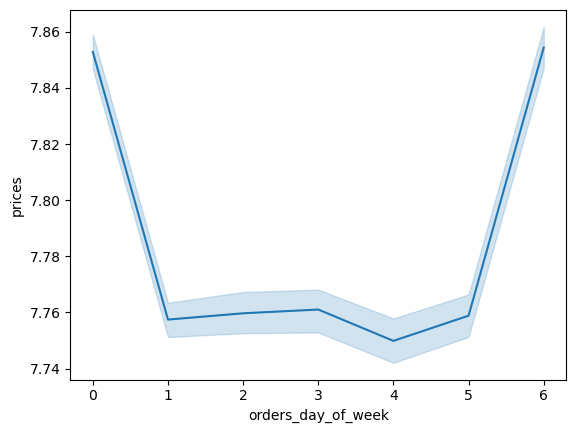

In [30]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## Exercise 3

<Axes: ylabel='Frequency'>

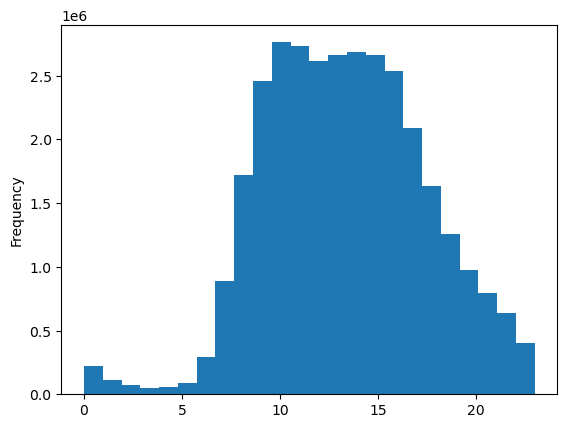

In [32]:
#Create a histogram 
customers_ords_prods_merged['order_hour_of_day'].plot.hist(bins = 24)


### The busiest times seem to be from 9 am to 4 pm. After that, there is a steady decline, until 5 am. From there, it start to pick up slowly again. 

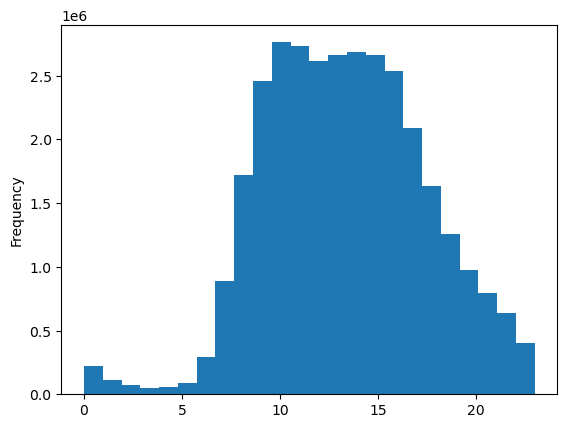

In [33]:
hist_order_hour_of_day = customers_ords_prods_merged['order_hour_of_day'].plot.hist(bins = 24)


## Exercise 4

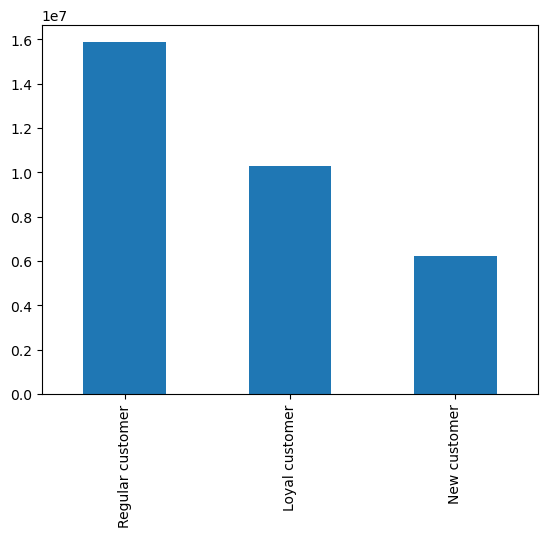

In [34]:
#create a bar chart
bar_loyalty_flag = customers_ords_prods_merged['loyalty_flag'].value_counts().plot.bar()


## Exercise 5

In [35]:
df_line = small[['order_hour_of_day','prices']]


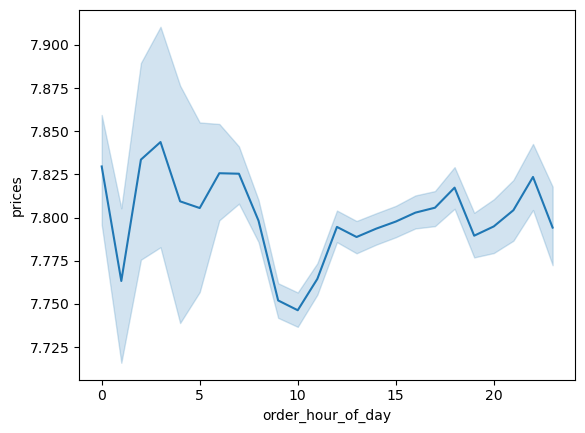

In [36]:
line_2 = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices')

### It seems like people are spending the most at around 2 am, and the least at 10 am. 

## Exercise 6

In [38]:
customers_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                            Dtype   
---  ------                            -----   
 0   order_id                          int64   
 1   user_id                           object  
 2   order_number                      int64   
 3   orders_day_of_week                int64   
 4   order_hour_of_day                 int64   
 5   number_of_days_since_prior_order  float64 
 6   product_id                        int64   
 7   add_to_cart_order                 int64   
 8   reordered                         int64   
 9   product_name                      object  
 10  aisle_id                          int64   
 11  department_id                     int64   
 12  prices                            float64 
 13  price_range_loc                   object  
 14  busiest_day                       object  
 15  busiest_days                      object  
 16  busiest_time_of_

In [40]:
df_line_2 = small[['Age','Number of Dependents']]


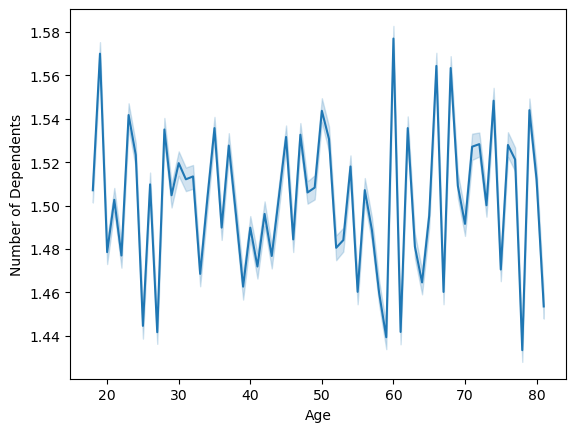

In [42]:
line_3 = sns.lineplot(data = df_line_2, x = 'Age', y = 'Number of Dependents')


### It doesn't seem like there is any connection between age and number of dependents, the graph is all over the place. 

## Exercise 7 

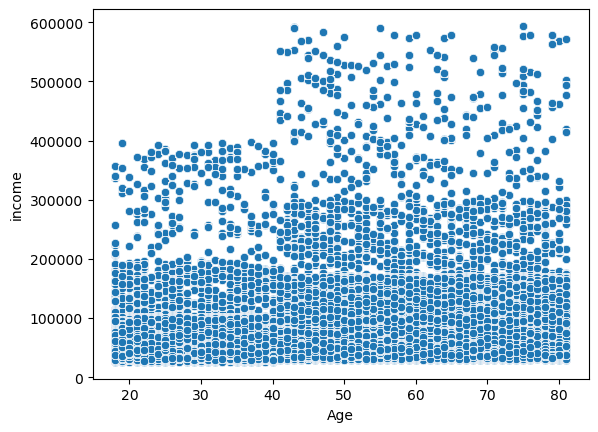

In [49]:
scat_2 = sns.scatterplot(x = 'Age', y = 'income',data = customers_ords_prods_merged)


### From the scatterplot, we can see that the vast majority of people make 200K. None of the people below 40, make more than 400K. There is a decent chunk of people in the age range from 40-80, who make between 200-300K. THere are some people in that same age group, who make between 300-600K (but significantly less). 

## Exercise 8

In [44]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_price.png'))


In [45]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))


In [46]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [47]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour_of_day.png'))

In [48]:
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [50]:
scat_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))

In [53]:
bar_sorted.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_sorted_orders_dow.png'))